# Лабораторная работа №6 

## Цель:1. Ознакомление с общей моделью на основе случайных полей и статической модели блокировки.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
from numpy.linalg import norm
from numpy import arccos, dot, pi, cross

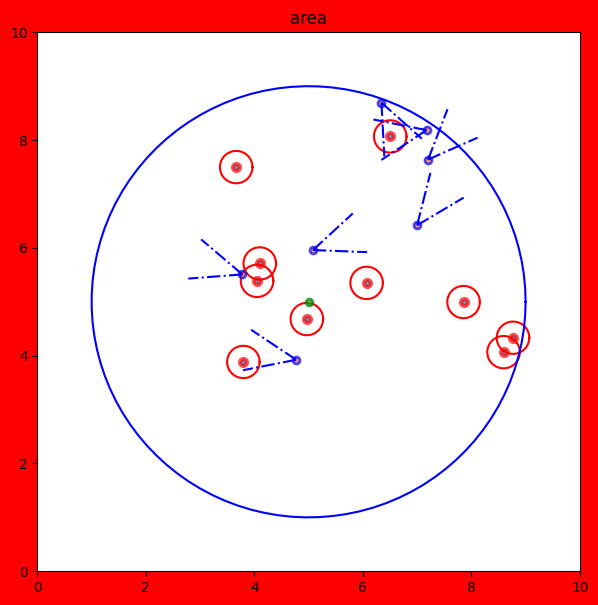

In [7]:
def plot_circle(x,y,r): 
    angles=np.linspace(0,2*np.pi,50)
    x_cir=x+r*np.cos(angles)
    y_cir=y+r*np.sin(angles)
    plt.plot(x_cir,y_cir,'red')

def plot_zone(x,y,distance,angle,fixang):  
    x1=x+distance*np.cos(angle) 
    y1=y+distance*np.sin(angle) 
    x2=x+distance*np.cos(angle+fixang) 
    y2=y+distance*np.sin(angle+fixang) 
    plt.plot([x,x1],[y,y1], '-.b')  
    plt.plot([x,x2],[y,y2], '-.b') 

def poisson_point_process(lambda0,R,area_size): # 
    N = np.random.poisson(lambda0*area_size**2)
    x1=[]
    y1=[]
    while len(x1)!=N:
        x = np.random.uniform(0,area_size)
        y = np.random.uniform(0,area_size)
        if ((x-x0)**2+(y-y0)**2<=R*R):
            x1.append(x)
            y1.append(y)
    return x1,y1

guard_size = 10 #
guard_radius=4 #
poisson_lam_block = 0.1 #
poisson_lam_int = 0.07 #
radius = 0.3 #
distance = 1 #
fixang = np.pi/4 #
list_point=np.array #

x0=guard_size/2 #
y0=guard_size/2

 
x_block, y_block=poisson_point_process(poisson_lam_block, guard_radius, guard_size)
x_int, y_int=poisson_point_process(poisson_lam_int, guard_radius, guard_size)
angle1 = np.random.uniform(0,2*np.pi,size=len(x_int))  
 
    
circle_angels=np.linspace(0, 2*np.pi, 100)
circle_x=x0+guard_radius*np.cos(circle_angels)
circle_y=y0+guard_radius*np.sin(circle_angels)

plt.figure(dpi=100, figsize=(7,7), facecolor='red')
plt.title('area')

plt.plot(x_block,y_block,'.', alpha=0.7,label='fist',lw=5,mec='r',mew=3,ms=10)
for i in range(len(x_block)):  
    plot_circle(x_block[i],y_block[i], radius)
plt.plot(x_int,y_int,'.', alpha=0.7,label='fist',lw=5,mec='b',mew=2,ms=10) 
for i in range(len(x_int)):  
    plot_zone(x_int[i],y_int[i],distance,angle1[i],fixang)
plt.plot(x0,y0,'.', alpha=0.7,label='fist',lw=5,mec='g',mew=2,ms=10) 
plt.plot(circle_x,circle_y,'blue')  

plt.xlim(0,guard_size)  
plt.ylim(0,guard_size)
plt.savefig('plot_1.png')

def distance(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

def check_pol(line_d1, line_d2,angle,fixang):  
    x1, y1 = line_d1  
    x2, y2 = line_d2  
    atan1=math.atan2((y2-y1),(x2-x1))
    if atan1<0:
        atan1=2*np.pi+atan1
    d1= atan1>angle and atan1<(angle+fixang)
    if d1==True:
        return True
    else:
        return False

def check_distance(A,B,C):   
    CA=(C-A)/norm(C-A)
    BA=(B-A)/norm(B-A)
    CB=(C-B)/norm(C-B)
    AB=(A-B)/norm(A-B)
    if arccos(dot(CA,BA))>1:
        return norm(C-A)
    if arccos(dot(CB,AB))>1:
        return norm(C-B)
    return norm(cross(A-B,A-C))/norm(B-A)

def crossing(x1,y1,x2,y2,x,y,radius):
    circle_point=[]
    point_1=[]
    point_2=[]
    point_1.extend([x1,y1])
    point_2.extend([x2,y2])
    for i in range(len(x)):
        circle_point.append([x[i],y[i]])
    
    for i in range(len(x)):
        if (np.round(check_distance(list_point(point_1), list_point(point_2), list_point(circle_point[i])),1)<=radius):
            return True

def interf(x0,y0,x_int,y_int,P,fixang):  
    rastoyanie=distance(x0,y0,x_int,y_int) 
    G=2/(1-np.cos(fixang/2))
    prx=P*G/(4*np.pi*rastoyanie**2)
    return prx


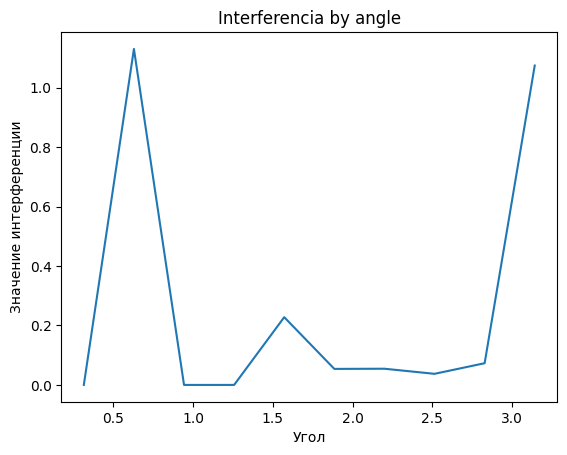

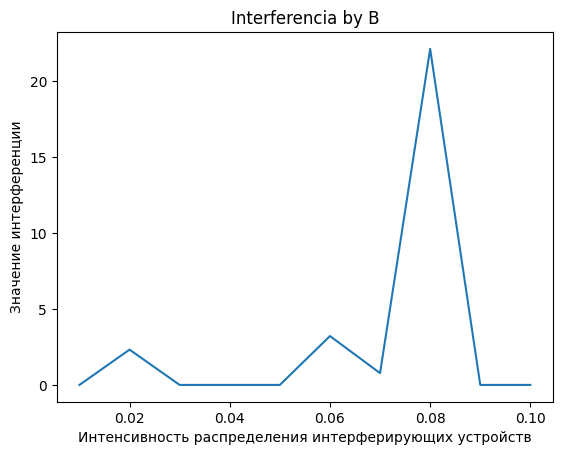

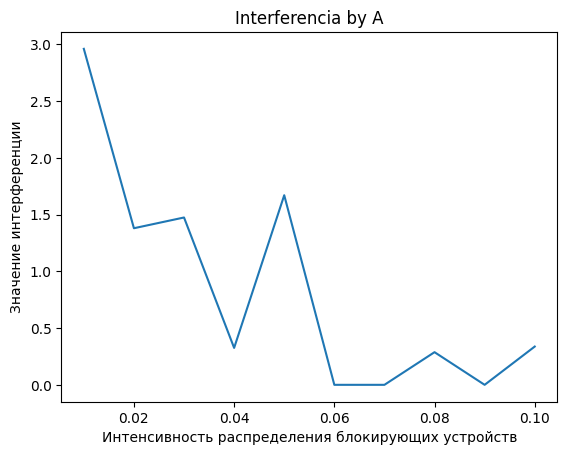

In [4]:
P=2
num_experiments = 1000

def immit(num_experiments,P,fixang,poisson_lam_block,poisson_lam_int,guard_radius,guard_size):
    Interf=[] 
    for j in range (num_experiments):
        Inter1=0 #
    x_block, y_block=poisson_point_process(poisson_lam_block, guard_radius, guard_size)
    x_int, y_int=poisson_point_process(poisson_lam_int, guard_radius, guard_size)
    angle1 = np.random.uniform(0,2*np.pi,size=len(x_int))
    for i in range((len(x_int))):    
        if check_pol([x_int[i],y_int[i]],[x0,y0],angle1[i],fixang)==True and crossing(x0,y0,x_int[i],y_int[i],x_block,y_block,radius) == None:
            Inter1=Inter1+interf(x0,y0,x_int[i],y_int[i],P,fixang) #суммирование значений интерференции для каждого устройства, в секторе которого находится антена и нет блокирующих объектов
    Interf.append(Inter1) #добавление значения к массиву
    return np.mean(Interf) #возврат среднего значения по массиву

#Для угла
num_experiments = 1000
Interf_fi=[] 
fixang=0
fixang_int=[]
shag=10
for l in range(shag):
    fixang=fixang+np.pi/shag #изменение угла
    fixang_int.append(fixang) #добавление угла к массиву углов для последующего построения графика
    Interf_fi.append(immit(num_experiments,P,fixang,poisson_lam_block,poisson_lam_int,guard_radius,guard_size)) # подсчёт среднего значения интерференции и добавление его к массиву

plt.figure(dpi=100)
plt.title('Interferencia by angle')
plt.plot(fixang_int,Interf_fi)
plt.xlabel('Угол')
plt.ylabel('Значение интерференции')
plt.savefig('plot_lab6_2.png')

#построение графика с изменением лямбды для интерферирующих устройств(аналогично)
Interf_fi=[]
fixang=np.pi/4
poisson_lam_int = 0
poisson_lam_int_op = []
#2PI/(PI/6)
for l in range(shag):
    poisson_lam_int=poisson_lam_int+0.01
    poisson_lam_int_op.append(poisson_lam_int)
    Interf_fi.append(immit(num_experiments,P,fixang,poisson_lam_block,poisson_lam_int,guard_radius,guard_size))

plt.figure(dpi=100)
plt.title('Interferencia by B')
plt.plot(poisson_lam_int_op,Interf_fi)
plt.xlabel('Интенсивность распределения интерферирующих устройств')
plt.ylabel('Значение интерференции')
plt.savefig('plot_3.png')

#построение графика с изменением лямбды для блокирующих устройств(аналогично)
Interf_fi=[]
fixang=np.pi/4
poisson_lam_int = 0.07
poisson_lam_block = 0
poisson_lam_block_op = [] 
for l in range(shag):
    poisson_lam_block=poisson_lam_block+0.01
    poisson_lam_block_op.append(poisson_lam_block)
    Interf_fi.append(immit(num_experiments,P,fixang,poisson_lam_block,poisson_lam_int,guard_radius,guard_size))

plt.figure(dpi=100)
plt.title('Interferencia by A')
plt.plot(poisson_lam_block_op,Interf_fi)
plt.xlabel('Интенсивность распределения блокирующих устройств')
plt.ylabel('Значение интерференции')
plt.savefig('plot_4.png')
